## Customer Churn Project

### Project Overview 
This project focuses on predicting customer churn in the telecom industry using a real-world dataset. By applying machine learning techniques such as logistic regression and decision trees, the aim is to identify patterns that lead to customer loss. The analysis follows the CRISP-DM methodology and includes data cleaning, exploratory analysis, model building, evaluation, and business recommendations. The final deliverables include a tableau dashboard and a stakeholder-friendly presentation.



# CRISP-DM Methodology


## 1. Business Understanding

### 1.1 Business Problem 

Customer churn is a key issue in the telecommunications industry, directly affecting profitability. Losing customers often costs more than acquiring new ones, so being able to predict which customers are likely to churn allows businesses to proactively intervene with retention strategies.


### 1.2 Key Questions

a. What proportion of customers churned vs stayed?

b. Which services are most associated with customer 

c. How does customer service call frequency relate to Churn?

### 1.3 Objectives of ths project

Predict whether a custmer wll churn or not.

Build and evaluate two models: a baseline model and an improved one.

Recommend the best model based on performance.

Provide actionable business insights to reduce churn.

## 2. Data Understanding 

### 2.1 Load data

In [354]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


In [355]:
# load the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
# check the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.2 Describe data 

In [356]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [357]:
# shape of the dataset
df.shape

(3333, 21)

The above results shows that the data set has 3333 rows and 21 clumns

In [358]:
# descriptive statistics of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [359]:
# column names of the dataset
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### 2.3 Data Understanding Visualizations


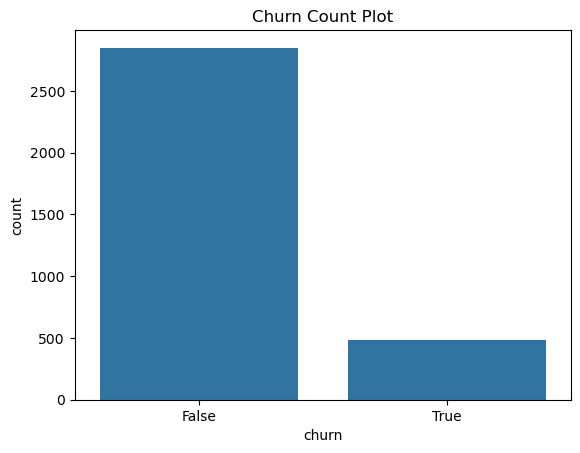

In [360]:
# Churn Count Plot
sns.countplot(x='churn', data=df)
plt.title('Churn Count Plot')
plt.show()

### What does the visualization above mean

The company retains most customers

Churned customers(Churn = True) are a minority class.

The dataset s mbalanced, and the models you train may be biased towards predicting the majority class(False) unless you handle this imbalance,.

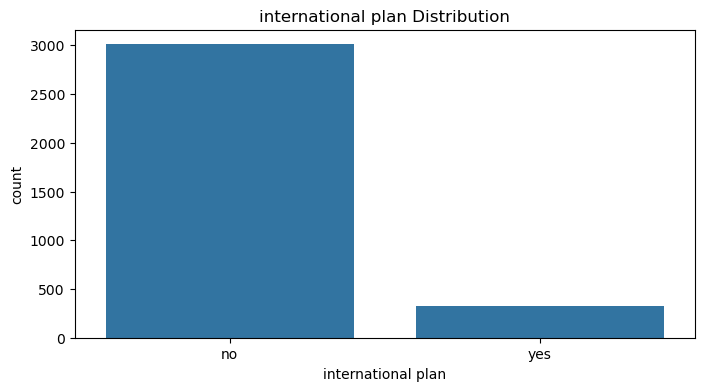

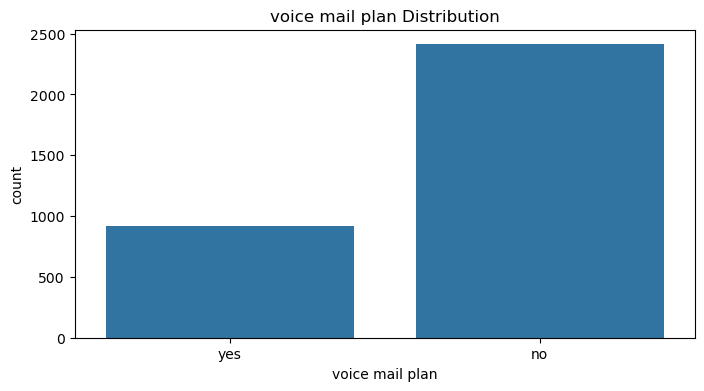

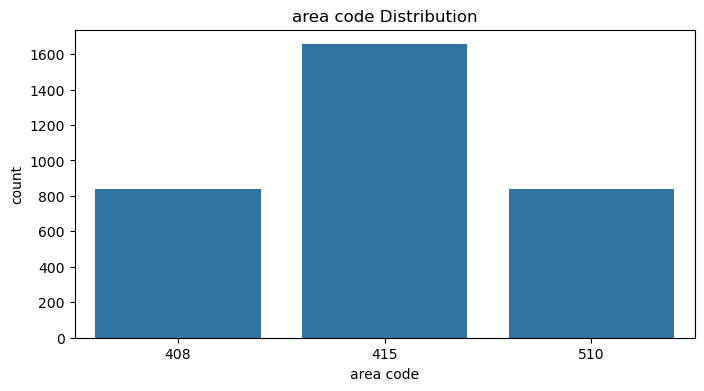

In [361]:
# bar plot of categorical feature distribution
categorical_features = ['international plan', 'voice mail plan', 'area code']
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

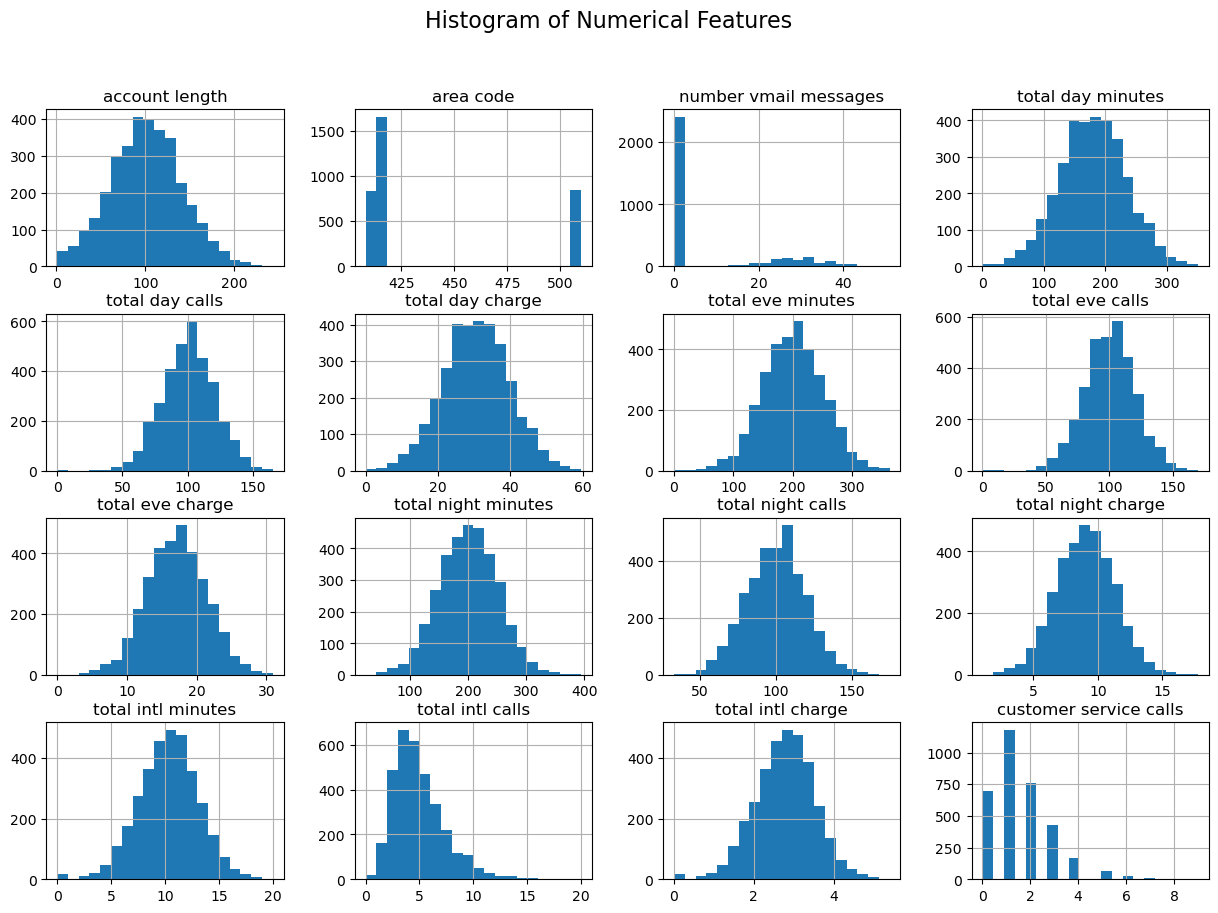

In [362]:
# histogram of numerical features
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.show()

## 3. Data Preparation 

### 3.1 Check for missing values

In [363]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As shown above there are no missing values.

### 3.2 Check for Duplicates

In [364]:
df.duplicated().sum()
df = df.drop_duplicates()

All duplicates have been dropped so now we have a dataset with no missing values and no duplicates.

### 3.3 Fix Data Types

In [365]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [366]:
df['churn'] = df['churn'].astype('category')
df['international plan'] = df['international plan'].astype('category')
df['voice mail plan'] = df['voice mail plan'].astype('category')
df['area code'] = df['area code'].astype('category')
df['state'] = df['state'].astype('category')

In [367]:
df.dtypes

state                     category
account length               int64
area code                 category
phone number                object
international plan        category
voice mail plan           category
number vmail messages        int64
total day minutes          float64
total day calls              int64
total day charge           float64
total eve minutes          float64
total eve calls              int64
total eve charge           float64
total night minutes        float64
total night calls            int64
total night charge         float64
total intl minutes         float64
total intl calls             int64
total intl charge          float64
customer service calls       int64
churn                     category
dtype: object

### 3.4 Drop Irrelevant Columns

In [368]:
# dropping unnecessary columns
df = df.drop(columns=['phone number'])
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

### 3.5 Feature Engineering

In [369]:
# handling categorical variables with one-hot encoding
df = pd.get_dummies(df, columns=['area code', 'state'], drop_first=True)

In [370]:
# creating a new feature 'total minutes'
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

In [371]:
# customer support intensity
df['high customer support'] = df['customer service calls'].apply(lambda x: 1 if x > 3 else 0)
df['high customer support'].value_counts()

high customer support
0    3066
1     267
Name: count, dtype: int64

The customer support intensity is used mainly to flag for customers who called customer support more than 3 times. Therefore the above results show 267 customers called customer support more than 3 times.

### 3.6 Recheck for Data Integrity

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   account length          3333 non-null   int64   
 1   international plan      3333 non-null   category
 2   voice mail plan         3333 non-null   category
 3   number vmail messages   3333 non-null   int64   
 4   total day minutes       3333 non-null   float64 
 5   total day calls         3333 non-null   int64   
 6   total day charge        3333 non-null   float64 
 7   total eve minutes       3333 non-null   float64 
 8   total eve calls         3333 non-null   int64   
 9   total eve charge        3333 non-null   float64 
 10  total night minutes     3333 non-null   float64 
 11  total night calls       3333 non-null   int64   
 12  total night charge      3333 non-null   float64 
 13  total intl minutes      3333 non-null   float64 
 14  total intl calls        

## 4. Exploratory Data Analysis(EDA)

### Key Queston 1 What proportion of customers churned vs stayed?
This gives an overview of the class balance

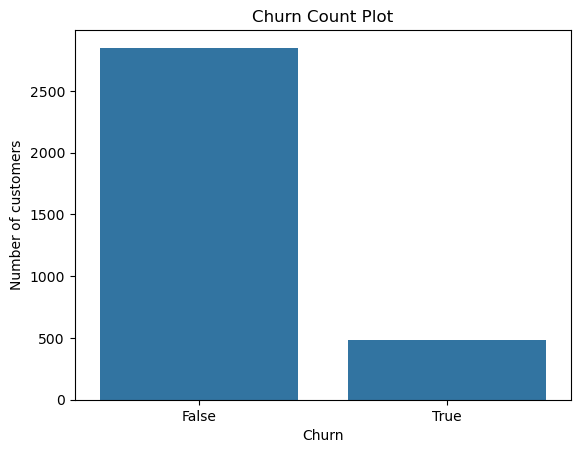

In [373]:
sns.countplot(x= 'churn', data = df)
plt.title('Churn Count Plot')
plt.xlabel('Churn')
plt.ylabel('Number of customers')
plt.show()

In [374]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

According to the visualization above there is a class imbalance where most of the customers stayed a small number of custmers churned 

### Key Question 2 Which services are most associated with customer 
This helps identify service types that correlate with churn. 

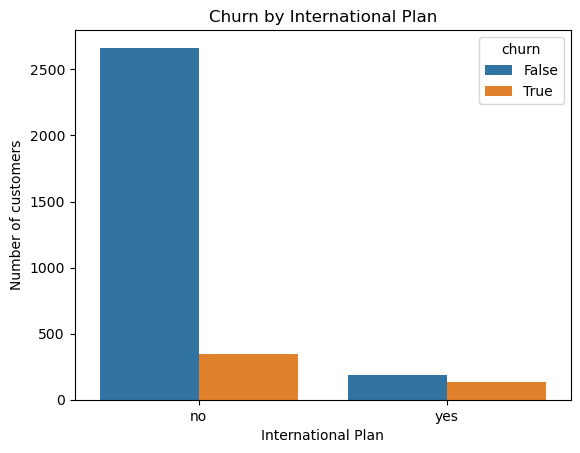

In [375]:
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Number of customers')
plt.show()

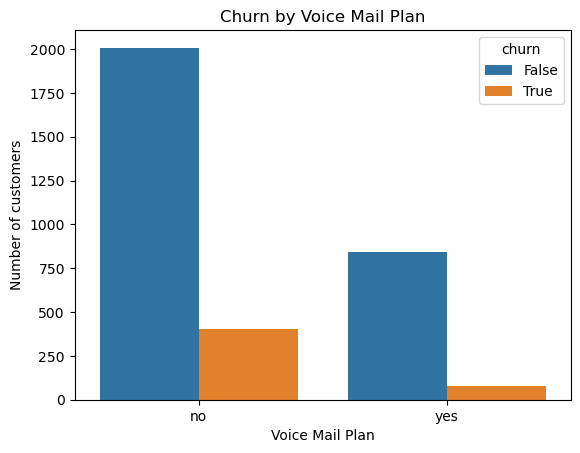

In [376]:
#countplot of voice mail plan vs churn
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of customers')
plt.show()

### Key Question 3 How does customer service call frequency relate to Churn?
This is for the purpose of knowing if users with high service issues are more likely to leave.

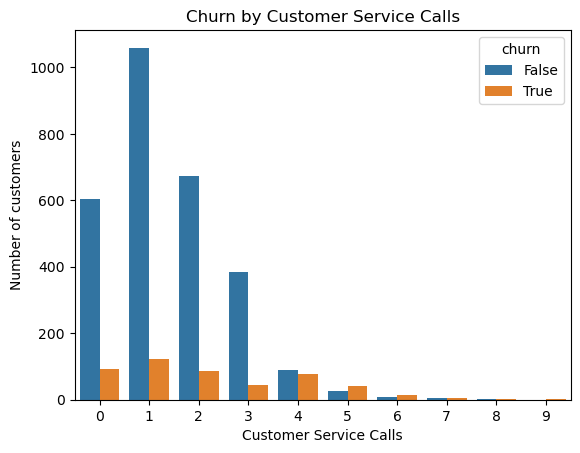

In [377]:
# customer service calls vs churn
sns.countplot(x='customer service calls', hue='churn', data=df)
plt.title('Churn by Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Number of customers')
plt.show()

## 5. Modelling

### 5.1 Train/Test Split

In [378]:
# changing the data type of 'churn' to int
df['churn'] = df['churn'].astype('int')

# binarizing categorical variables
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# training and testing data split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.2 Base Model-Logistic Regression

In [379]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logreg = LogisticRegression(class_weight= 'balanced', max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)[:, 1]


### 5.3 Evaluating the base model

In [380]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# evaluating the model
print('-----{"Logistic Regression Model"}-----')
print('Accuracy:', round(accuracy_score(y_test, y_pred_log), 4))
print('Precision:', round(precision_score(y_test, y_pred_log), 4))
print('Recall:', round(recall_score(y_test, y_pred_log), 4))
print('F1 Score:', round(f1_score(y_test, y_pred_log), 4))
print('ROC AUC:', round(roc_auc_score(y_test, y_proba_log), 4))
print('\nClassification Report:\n', classification_report(y_test, y_pred_log))
    

-----{"Logistic Regression Model"}-----
Accuracy: 0.8381
Precision: 0.478
Recall: 0.7525
F1 Score: 0.5846
ROC AUC: 0.8584

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       566
           1       0.48      0.75      0.58       101

    accuracy                           0.84       667
   macro avg       0.71      0.80      0.74       667
weighted avg       0.88      0.84      0.85       667



### 5.4 Advanced Model - Decision Tree
Predict

In [381]:
# decision tree model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(class_weight= 'balanced', random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

### 5.5 Evaluating the advanced model

In [387]:
# evaluating the decision tree model
print('-----{"Decision Tree Model"}-----')
print('Accuracy:', round(accuracy_score(y_test, y_pred_tree), 4))
print('Precision:', round(precision_score(y_test, y_pred_tree), 4))
print('Recall:', round(recall_score(y_test, y_pred_tree), 4))
print('F1 Score:', round(f1_score(y_test, y_pred_tree), 4))
print('ROC AUC:', round(roc_auc_score(y_test, y_proba_tree), 4))
print('\nClassification Report:\n', classification_report(y_test, y_pred_tree))
    

-----{"Decision Tree Model"}-----
Accuracy: 0.9175
Precision: 0.7347
Recall: 0.7129
F1 Score: 0.7236
ROC AUC: 0.8335

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.73      0.71      0.72       101

    accuracy                           0.92       667
   macro avg       0.84      0.83      0.84       667
weighted avg       0.92      0.92      0.92       667



### 5.6 Confusion Matrix

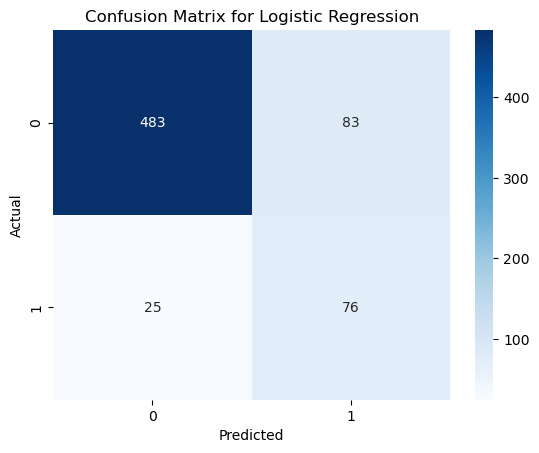

In [383]:
# confusion matrix for logistic regression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

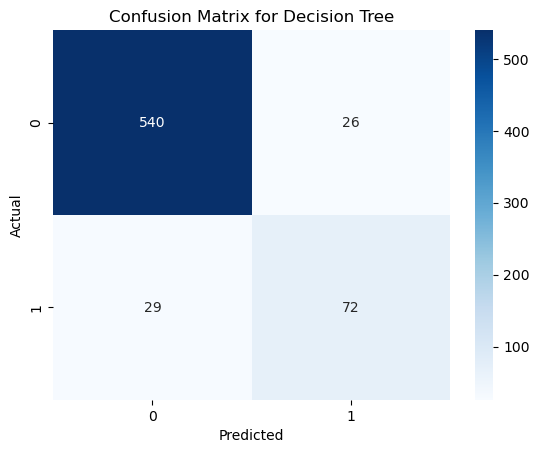

In [384]:
# confusion matrix for decision tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.7 Model Comparison
#### ROC Curve

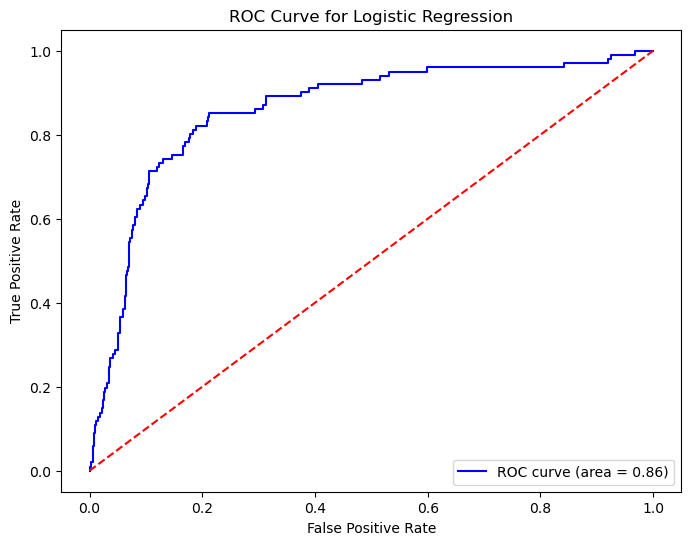

In [385]:
#ROC curve for logistic regression
from sklearn.metrics import roc_curve, auc
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


The ROC curve (blue line)is generally positioned further away from the random classifier line(red dotted line), especially in the middle range of FPR.

The Area Under the Curve is 0.86. This indicates a good ability of the Logistic Regression model to discriminate between the positive and negative classes.

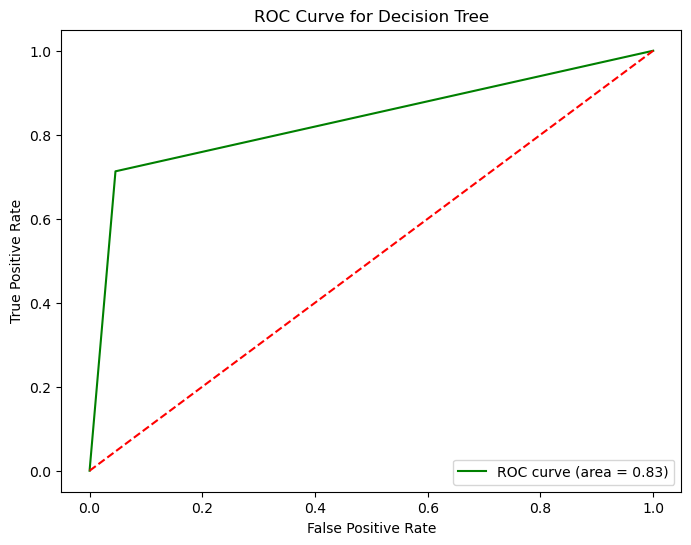

In [386]:
# ROC curve for decision tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='green', label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The ROC curve(green line) is also above the random classifier line, indicating better than random performance.

The Area Under the Curve is 0.83. This suggests that the model also performs well in distinguishing between the classes, but slightly less so than the Logistic Regression model based on the AUC value.

In [389]:
print('-----{"Logistic Regression Model"}-----')
print('Accuracy:', round(accuracy_score(y_test, y_pred_log), 4))
print('Precision:', round(precision_score(y_test, y_pred_log), 4))
print('Recall:', round(recall_score(y_test, y_pred_log), 4))
print('F1 Score:', round(f1_score(y_test, y_pred_log), 4))
print('ROC AUC:', round(roc_auc_score(y_test, y_proba_log), 4))


print('-----{"Decision Tree Model"}-----')
print('Accuracy:', round(accuracy_score(y_test, y_pred_tree), 4))
print('Precision:', round(precision_score(y_test, y_pred_tree), 4))
print('Recall:', round(recall_score(y_test, y_pred_tree), 4))
print('F1 Score:', round(f1_score(y_test, y_pred_tree), 4))
print('ROC AUC:', round(roc_auc_score(y_test, y_proba_tree), 4))

-----{"Logistic Regression Model"}-----
Accuracy: 0.8381
Precision: 0.478
Recall: 0.7525
F1 Score: 0.5846
ROC AUC: 0.8584
-----{"Decision Tree Model"}-----
Accuracy: 0.9175
Precision: 0.7347
Recall: 0.7129
F1 Score: 0.7236
ROC AUC: 0.8335


##### Accuracy
The Decision Tree model has a significantly higher accuracy (91.75%)compared to the Logistic Regression model(83.81%). This suggests that the Decision Tree corrrectly classifier a larger proportion of the overall instances.

##### Precision
The Decision Tree model also shows better precision(0.7347) than the Logistic Regression model(0.4780). This means that when Decision Tree predicts the positive class, it is correct a larger percentage of the time, resulting in fewer false positives.

##### Recall
The Logistic Regression model has a slightly higher recall(0.7525) compared to the Decision Tree(0.7129). This indicates the Logistic Regressiom model is slightly better at identifying all the actual positive instances, leading to fewer false negatives.

##### F1 Score
The Decision Tree model has a notably higherF1 score(0.7326) compared to the Logistic Regression model(0.5846). The F1 score balances precision and recall, and a higher value generally indicates a better overall performance, especially in cases of class imbalance present in this dataset.



## Conclusion
### The Better Model
#### The Decision Tree model appears to be the better overall model. Here's why:

##### Significantly Higher Accuracy:
The Decision Tree classifies a substantially larger percentage of instances.

##### Better Precision and F1 Score:
The Decision Tree excels in precision, meaning fewer false positives, and achieves a much betther balance between precision and recall, as indicated by the higher F1 score.
